<a href="https://colab.research.google.com/github/Pedro-A-D-S/diamonds-price/blob/main/Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This project aims to make an EDA of diamond prices and apply a predictive model for the price.

## EDA

## Imports

In [1]:
import pandas as pd
import seaborn as sns
sns.set_palette("winter")
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Functions

In [2]:
def catplot_by_price(col):
  sns.catplot(x = col, y = "price", data = diamond, kind = 'bar', aspect = 2)

In [3]:
def count(col):
  counts = diamond[col].value_counts()
  print(counts)
  return None

In [4]:
def plot_quantity(data, col):
  ax = sns.set(rc = {'figure.figsize': (10, 6)})
  order = data[col].value_counts().index
  ax = sns.countplot(x = col, data = data, order = order)
  ax.set_title('Quantity of diamonds by {}'.format(col), fontsize = 16)
  ax.set_xlabel(f'{col}', fontsize = 14)
  ax.set_ylabel('Quantity', fontsize = 14)
  ax = ax
  return ax

In [5]:
def quantity_diamonds_by_(data, col, hue):

  ax = sns.set(rc = {'figure.figsize': (10, 6)})
  ax = sns.countplot(x = col, data = data, hue = hue)
  ax.set_title('Number of diamonds by {} and {} distribution'.format(col, hue), fontsize = 16)
  ax.set_xlabel('Clarity', fontsize = 14)
  ax.set_ylabel('Quantity', fontsize = 14)
  ax = ax

  return ax

In [6]:
def mean_price_by_cathegory(data, col):

  mean_price_by_cathegory = data.groupby([col]).mean().price.round(2).sort_values(ascending = False).reset_index()
  mean_price_by_cathegory = pd.DataFrame(mean_price_by_cathegory)
  mean_price_by_cathegory.rename(columns = {'price':'mean price'}, inplace = True)
  mean_price_by_cathegory
  
  return mean_price_by_cathegory

In [7]:
def median_price_by_cathegory(data, col):

  median_price_by_cathegory = data.groupby([col]).median().price.round(2).sort_values(ascending = False).reset_index()
  median_price_by_cathegory = pd.DataFrame(median_price_by_cathegory)
  median_price_by_cathegory.rename(columns = {'price':'median price'}, inplace = True)
  median_price_by_cathegory
  
  return median_price_by_cathegory

In [8]:
def std_price_by_cathegory(data, col):

  std_price_by_clarity = data.groupby([col]).std().price.round(2).sort_values(ascending = False).reset_index()
  std_price_by_clarity = pd.DataFrame(std_price_by_clarity)
  std_price_by_clarity.rename(columns = {'price':'std of price'}, inplace = True)
  std_price_by_clarity

  return std_price_by_clarity

In [9]:
diamond = sns.load_dataset('diamonds')
diamond.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

# Description of dataset features

Carat : Diamond weight in carats (1 carat = 2 grams)

Cut : Describes the quality of the diamond's cut. Quality increases in order: Fair, Good, Very Good, Premium, Ideal.

Color : Color of the diamond, with D being the best and J being the worst.

Clarity: Diamond clarity refers to the lack of flaws and imperfections.

Depth : The height of the diamond.

Depth: The height of the diamond, measured from the culet (a culet is a flat face on the bottom of a gemstone) to the table, divided by the average girdle diameter. In circular diamonds, there is not one that is perfectly round. Therefore, each diameter is not the same and therefore the average value is taken.

Table : The width of the diamond expressed as a percentage of its average diameter.

Price : Diamond price in dollars.

X : Diamond width in millimeters.

Y : Height of the diamond in millimeters.

Z : Diamond length in millimeters.

## Dataset description

In [69]:
description = diamond.describe().round(2)
description

carat     depth     table     price         x         y         z  \
count  40074.00  40074.00  40074.00  40074.00  40074.00  40074.00  40074.00   
mean       0.75     61.98     57.06   3635.94      5.61      5.62      3.48   
std        0.43      0.73      1.82   3686.51      1.06      1.06      0.66   
min        0.20     60.60     54.00    326.00      3.74      3.71      2.25   
25%        0.38     61.40     56.00    900.00      4.63      4.64      2.87   
50%        0.64     62.00     57.00   2170.50      5.54      5.54      3.43   
75%        1.02     62.50     58.00   5071.00      6.46      6.46      4.01   
max        2.12     63.60     62.00  18818.00      8.22      8.19      5.08   

       log_price  log_carat     log_x     log_y     log_z  
count   40074.00   40074.00  40074.00  40074.00  40074.00  
mean        7.72      -0.45      1.71      1.71      1.23  
std         1.00       0.57      0.19      0.19      0.19  
min         5.79      -1.61      1.32      1.31      0.81  
25%         6.80      -0.97      1.53      1.53      1.05  
50%         7.68      -0.45      1.71      1.71      1.23  
75%         8.53       0.02      1.87      1.87      1.39  
max         9.84       0.75      2.11      2.10      1.63

It is possible to obtain several relevant informations about the analyzed data, such as the average price (mean) of a diamond is almost 4 thousand dollars.

However, when comparing the minimum and maximum prices, they have a wide range of values, as indicated by the high standard deviation (std).

Another aspect to take into account is the existence of values ​​x = y = z = 0, which makes them unreal since there are no diamonds with these spatial dimensions.

## Removing outliers

In [11]:
# investigating duplicated
diamond.duplicated().sum()

146

In [12]:
# dropping duplicates
diamond = diamond.drop_duplicates()

In [13]:
# removing zeros
diamond = diamond[(diamond[['x','y','z']] != 0).all(axis = 1)]

In [14]:
# describing after outliers removing
diamond.describe().round(2)

carat     depth     table     price         x         y         z
count  53775.00  53775.00  53775.00  53775.00  53775.00  53775.00  53775.00
mean       0.80     61.75     57.46   3931.22      5.73      5.73      3.54
std        0.47      1.43      2.23   3985.92      1.12      1.14      0.70
min        0.20     43.00     43.00    326.00      3.73      3.68      1.07
25%        0.40     61.00     56.00    951.00      4.71      4.72      2.91
50%        0.70     61.80     57.00   2401.00      5.70      5.71      3.53
75%        1.04     62.50     59.00   5324.00      6.54      6.54      4.03
max        5.01     79.00     95.00  18823.00     10.74     58.90     31.80

Now our dataset hasn't zeros in its dimensions.

Removing outliers of numerical data

In [70]:
# defining series of variable
x = diamond['x']

# quantiles and interval interquantile
Q1 = x.quantile(.45)
Q3 = x.quantile(.75)
IIQ = Q3 - Q1

# lower and upper limits
lower_limit = Q1 - 1.5 * IIQ
upper_limit = Q3 + 1.5 * IIQ

# filtering by limits
selection = (x >= lower_limit) & (x <= upper_limit)
diamond = diamond[selection]

In [16]:
x = diamond['y']

# quantiles and interval interquantile
Q1 = x.quantile(.45)
Q3 = x.quantile(.75)
IIQ = Q3 - Q1

# lower and upper limits
lower_limit = Q1 - 1.5 * IIQ
upper_limit = Q3 + 1.5 * IIQ

# filtering by limits
selection = (x >= lower_limit) & (x <= upper_limit)
diamond = diamond[selection]

In [17]:
x = diamond['z']

# quantiles and interval interquantile
Q1 = x.quantile(.45)
Q3 = x.quantile(.75)
IIQ = Q3 - Q1

# lower and upper limits
lower_limit = Q1 - 1.5 * IIQ
upper_limit = Q3 + 1.5 * IIQ

# filtering by limits
selection = (x >= lower_limit) & (x <= upper_limit)
diamond = diamond[selection]

In [18]:
x = diamond['table']

# quantiles and interval interquantile
Q1 = x.quantile(.45)
Q3 = x.quantile(.75)
IIQ = Q3 - Q1

# lower and upper limits
lower_limit = Q1 - 1.5 * IIQ
upper_limit = Q3 + 1.5 * IIQ

# filtering by limits
selection = (x >= lower_limit) & (x <= upper_limit)
diamond = diamond[selection]

In [19]:
x = diamond['depth']

# quantiles and interval interquantile
Q1 = x.quantile(.45)
Q3 = x.quantile(.75)
IIQ = Q3 - Q1

# lower and upper limits
lower_limit = Q1 - 1.5 * IIQ
upper_limit = Q3 + 1.5 * IIQ

# filtering by limits
selection = (x >= lower_limit) & (x <= upper_limit)
diamond = diamond[selection]

## Getting information

In [20]:
# looking for null values
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

The dataset has no null data.

## Extracting descriptive price statistics by category

# Cathegories by price

In [76]:
fig = px.histogram(data_frame = diamond, x = 'clarity', text_auto = '.3s',
                   template = 'plotly_dark',
                   )

fig.update_xaxes(categoryorder = 'total descending')
fig.update_yaxes(showticklabels = False)

fig.update_layout(
    title = {
        'text': "Quantity of Diamonds by Color",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Colors',
    yaxis_title = 'Quantity',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    font = dict(size = 18),
    title_font_family="Arial",
    title_font_color= "White")

fig.update_traces(textposition = 'outside',textfont_size = 16, marker_color = 'Red')

fig.show()

# Clarity

In [22]:
count(col = 'clarity')

SI1     9491
VS2     9464
VS1     6320
SI2     5897
VVS2    4101
VVS1    3017
IF      1456
I1       328
Name: clarity, dtype: int64


In [78]:
fig = px.histogram(diamond, x='clarity', template = 'plotly_dark',
                   text_auto = '.3s')

fig.update_xaxes(categoryorder = 'total descending')
#fig.update_yaxes(showticklabels = False)

fig.update_layout(
    title = {
        'text': "Diamonds by clarity",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Clarity',
    yaxis_title = 'Quantity',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    font = dict(size = 18),
    title_font_family="Arial",
    title_font_color= "White")

fig.update_traces(textposition = 'outside',textfont_size = 16, marker_color = 'Red')

fig.show()

It is possible to notice the decrease in diamonds' number with clarity.

In [82]:
fig = px.histogram(diamond, x='clarity', color="color", barmode='group',
                   template = 'plotly_dark',
                   text_auto = '.3s')

fig.update_xaxes(categoryorder = 'total descending')
#fig.update_yaxes(showticklabels = False)

fig.update_layout(
    title = {
        'text': "Diamonds by clarity and color destribuition",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Clarity',
    yaxis_title = 'Quantity',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    font = dict(size = 18),
    title_font_family="Arial",
    title_font_color= "White")

fig.update_traces(textposition = 'outside',textfont_size = 16)

fig.show()

There is a predominance of E and G colors in the cuts with the highest amounts of diamonds in the dataset, which is attenuated as these amounts decrease.

In [84]:
fig = px.histogram(diamond, x='clarity', color="cut", barmode='group',
                   template = 'plotly_dark',
                   text_auto = '.3s')

fig.update_xaxes(categoryorder = 'total descending')
# fig.update_yaxes(showticklabels = False)

fig.update_layout(
    title = {
        'text': "Diamonds by clarity and cut destribuition",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Clarity',
    yaxis_title = 'Quantity',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    font = dict(size = 18),
    title_font_family="Arial",
    title_font_color= "White")

fig.update_traces(textposition = 'outside',textfont_size = 16)

fig.show()

In [27]:
mean_price = diamond.groupby(by = 'clarity').agg({'price':'mean'}).round(2).reset_index().sort_values(by = 'price',
                                                                                         ascending = False)
mean_price['percent'] = ((mean_price['price'] / mean_price['price'].sum()) * 100).round(2)
mean_price['acc_sum'] = mean_price['percent'].cumsum().round(2)

In [85]:
fig = px.bar(data_frame = mean_price, x = 'clarity', y = 'price', text_auto = '.3s',
             template = 'plotly_dark')

fig.update_xaxes(categoryorder = 'total descending')

fig.update_layout(
    title = {
        'text': 'Mean Price by Clarity',
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Clarity',
    yaxis_title = 'Quantity',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    font = dict(size = 18),
    title_font_family="Arial",
    title_font_color= "White")

fig.update_traces(textposition = 'outside',textfont_size = 16)

fig.show()

As we can see, the mean price decreases with the decrease of quality in clarity.

In [29]:
# calculate the mean price for each clarity and returns a dataframe
diamond_mean_price_by_clarity = mean_price_by_cathegory(data = diamond, col = 'clarity')

# calculate the median price for each clarity and returns a dataframe
diamond_median_price_by_clarity = median_price_by_cathegory(data = diamond, col = 'clarity')

# calculate the standard deviation of price for each clarity and returns a dataframe
diamond_std_price_by_clarity = std_price_by_cathegory(data = diamond, col = 'clarity')

In [30]:
fig = make_subplots(rows = 2, cols = 2)

fig = make_subplots(rows = 2,
                    cols = 2,
                    specs=[[{}, {}],
                    [{"colspan": 2}, None]],
                    subplot_titles = [
                        'Mean Price',  # 1. subplot title
                        'Median Price',# 2. subplot title
                        'Std Price'    # 3. subplot title
])

# add the 1st graph by specifying which row and column it will come to
fig.add_trace(go.Bar(x=diamond_mean_price_by_clarity['clarity'], 
                     y= diamond_mean_price_by_clarity['mean price'], textposition='auto',
                     name='Mean'), row = 1, col = 1)
# add the 2nd graph
fig.add_trace(go.Bar(x=diamond_median_price_by_clarity['clarity'], 
                     y= diamond_median_price_by_clarity['median price'], textposition='auto',
                     name='Median'), row = 1, col = 2)
# add the 3th graph
fig.add_trace(go.Bar(x = diamond_std_price_by_clarity['clarity'], 
                     y = diamond_std_price_by_clarity['std of price'], textposition='auto',
                     name='Std'), row = 2, col = 1)

# Update xaxis properties
fig.update_xaxes(title_text="Clarity", row=1, col=1)
fig.update_xaxes(title_text="Clarity", row=1, col=2)
fig.update_xaxes(title_text="Clarity", row=2, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Price (USS)", row=1, col=1)
fig.update_yaxes(title_text="Price (USS)", row=1, col=2)
fig.update_yaxes(title_text="Price (USS)", row=2, col=1)

fig.update_layout(title = 'Descriptive Statistics of Price (Clarity)', title_x = 0.5)

# Cut

In [31]:
count(col = 'cut')

Ideal        19288
Premium       9830
Very Good     8999
Good          1914
Fair            43
Name: cut, dtype: int64


In [87]:
fig = px.histogram(diamond, x='cut', template = 'plotly_dark',
                   text_auto = '.3s')

fig.update_xaxes(categoryorder = 'total descending')

fig.update_layout(
    title = {
        'text': "Diamonds by cut",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Cut',
    yaxis_title = 'Quantity',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    font = dict(size = 18),
    title_font_family="Arial",
    title_font_color= "White")

fig.update_traces(textposition = 'outside', textfont_size = 16, marker_color = 'Red')

fig.show()

The diamonds quantity decreases with the quality of the cut.

In [89]:
fig = px.histogram(diamond, x='cut', color="color", barmode='group',
                   text_auto = '.2s', template = 'plotly_dark')

fig.update_xaxes(categoryorder = 'total descending')
# fig.update_yaxes(showticklabels = False)

fig.update_layout(
    title = {
        'text': "Diamonds by clarity and cut destribuition",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Clarity',
    yaxis_title = 'Quantity',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    font = dict(size = 18),
    title_font_family="Arial",
    title_font_color= "White")

fig.update_traces(textposition = 'outside',textfont_size = 16)

fig.show()

This is how the colors are distributed in relation to the types of cuts. There is a predominance of G and E colors in the first cuts and this behavior is accentuated along the distributions.

In [34]:
# calculate the mean price for each cut and returns a dataframe
diamond_mean_price_by_cut = mean_price_by_cathegory(data = diamond, col = 'cut')

# calculate the mean price for each cut and returns a dataframe
diamond_median_price_by_cut = median_price_by_cathegory(data = diamond, col = 'cut')

# calculate the mean price for each cut and returns a dataframe
diamond_std_price_by_cut = std_price_by_cathegory(data = diamond, col = 'cut')

In [35]:
fig = make_subplots(rows = 2, cols = 2)

fig = make_subplots(rows = 2,
                    cols = 2,
                    specs=[[{}, {}],
                    [{"colspan": 2}, None]],
                    subplot_titles = [
                        'Mean Price',  # 1. subplot title
                        'Median Price',# 2. subplot title
                        'Std Price'    # 3. subplot title
])

# add the 1st graph by specifying which row and column it will come to
fig.add_trace(go.Bar(x=diamond_mean_price_by_cut['cut'], 
                     y= diamond_mean_price_by_cut['mean price'], textposition='auto', name='Mean'), row = 1, col = 1)
# add the 2nd graph
fig.add_trace(go.Bar(x=diamond_median_price_by_cut['cut'], 
                     y= diamond_median_price_by_cut['median price'], textposition='auto', name='Median'), row = 1, col = 2)
# add the 3th graph
fig.add_trace(go.Bar(x = diamond_std_price_by_cut['cut'], 
                     y = diamond_std_price_by_cut['std of price'], textposition='auto', name='Std'), row = 2, col = 1)

# Update xaxis properties
fig.update_xaxes(title_text="Cut", row=1, col=1)
fig.update_xaxes(title_text="Cut", row=1, col=2)
fig.update_xaxes(title_text="Cut", row=2, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Price (USS)", row=1, col=1)
fig.update_yaxes(title_text="Price (USS)", row=1, col=2)
fig.update_yaxes(title_text="Price (USS)", row=2, col=1)

fig.update_layout(title = 'Descriptive Statistics of Price (cut)', title_x = 0.5)

As well as clarity, cut also intuitively has a linear relationship to price.

# Color

In [91]:
fig = px.histogram(data_frame = diamond, x = 'color', text_auto = '.3s',
                   template = 'plotly_dark',
                   )

fig.update_xaxes(categoryorder = 'total descending')
fig.update_yaxes(showticklabels = False)

fig.update_layout(
    title = {
        'text': "Quantity of Diamonds by Color",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Colors',
    yaxis_title = 'Quantity',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    font = dict(size = 18),
    title_font_family="Arial",
    title_font_color= "White")

fig.update_traces(textposition = 'outside',textfont_size = 16, marker_color = 'Red')

fig.show()

In [37]:
# calculate the mean price for each color and returns a dataframe
diamond_mean_price_by_color = mean_price_by_cathegory(data = diamond, col = 'color')

# calculate the median price for each color and returns a dataframe
diamond_median_price_by_color = median_price_by_cathegory(data = diamond, col = 'color')

# calculate the standard deviation of price for each color and returns a dataframe
diamond_std_price_by_color = std_price_by_cathegory(data = diamond, col = 'color')

In [38]:
fig = make_subplots(rows = 2, cols = 2)

fig = make_subplots(rows = 2,
                    cols = 2,
                    specs=[[{}, {}],
                    [{"colspan": 2}, None]],
                    subplot_titles = [
                        'Mean Price',  # 1. subplot title
                        'Median Price',# 2. subplot title
                        'Std Price'    # 3. subplot title
])

# add the 1st graph by specifying which row and column it will come to
fig.add_trace(go.Bar(x=diamond_mean_price_by_color['color'], 
                     y= diamond_mean_price_by_color['mean price'], textposition='auto', name='Mean'), row = 1, col = 1)
# add the 2nd graph
fig.add_trace(go.Bar(x=diamond_median_price_by_color['color'], 
                     y= diamond_median_price_by_color['median price'], textposition='auto', name='Median'), row = 1, col = 2)
# add the 3th graph
fig.add_trace(go.Bar(x = diamond_std_price_by_color['color'], 
                     y = diamond_std_price_by_color['std of price'], textposition='auto', name='Std'), row = 2, col = 1)

# Update xaxis properties
fig.update_xaxes(title_text="Color", row=1, col=1)
fig.update_xaxes(title_text="Color", row=1, col=2)
fig.update_xaxes(title_text="Color", row=2, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Price (USS)", row=1, col=1)
fig.update_yaxes(title_text="Price (USS)", row=1, col=2)
fig.update_yaxes(title_text="Price (USS)", row=2, col=1)

fig.update_layout(title = 'Descriptive Statistics of Price (color)', title_x = 0.5)

In [93]:
fig = px.histogram(diamond, x='color', color="cut", barmode='group',
                   text_auto = True, template = 'plotly_dark')

fig.update_xaxes(categoryorder = 'total descending')

fig.update_layout(
    title = {
        'text': "Diamonds by color and cut destribuition",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Colors',
    yaxis_title = 'Quantity',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    font = dict(size = 18),
    title_font_family="Arial",
    title_font_color= "White")

fig.update_traces(textposition = 'outside',textfont_size = 16)

fig.show()

In [95]:
fig = px.histogram(diamond, x='color', color="clarity", barmode='group',
                   text_auto = True, template = 'plotly_dark')

fig.update_xaxes(categoryorder = 'total descending')

fig.update_layout(
    title = {
        'text': "Diamonds by color and clarity destribuition",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Colors',
    yaxis_title = 'Quantity',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    font = dict(size = 18),
    title_font_family="Arial",
    title_font_color= "White")

fig.update_traces(textposition = 'outside',textfont_size = 16)

fig.show()

As well as the two previous variables, color also shows a linear decrease with price.

# Correlations between variables

Considering that the descriptive statistics have linear relationships with the price, we will check the correlations between the variables and test the hypothesis raised by the study of the graphs.

In [41]:
correlation = diamond.corr().round(2)

In [100]:
fig = px.imshow(correlation, text_auto = True, template = 'plotly_dark')

fig.update_layout(
    title = {
        'text': "Correlation Heatmap",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

fig.show()

In fact, it is possible to notice a strong correlation between the variables carat, x, y and z with the price as seen in the heatmap and by analyzing the regression lines of the variables in relation to the price.

# Frequency Distributions

Let us now study the distribution of diamonds present in the dataset with respect to the variables carat and depth.

In [103]:
fig = px.histogram(data_frame = diamond,
                   x = 'carat', template = 'plotly_dark')
fig.update_layout(
    title = {
        'text': "Diamonds distribuition by carat",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Carat',
    yaxis_title = 'Frequency',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    title_font_family="Arial",
    title_font_color= "White",
    font = dict(size = 18),
    legend_title_font_color = "green")

fig.update_traces(marker_color = 'Red')

fig.show()

In [106]:
fig = px.histogram(data_frame = diamond,
                   x = 'depth', template = 'plotly_dark')
fig.update_layout(
    title = {
        'text': "Diamonds distribuition by depth",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Depth',
    yaxis_title = 'Frequency',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    title_font_family="Arial",
    title_font_color= "White",
    font = dict(size = 18),
    legend_title_font_color = "green")

fig.update_traces(marker_color = 'Red')

fig.show()

# Linear regression model

Finding a high correlation with price and variables, let's use Python's sklearn library to try to predict price values ​​with respect to these variables.

In [46]:
X1 = diamond[['carat', 'x', 'y', 'z']]
y1 = diamond[['price']]

In [47]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 2811)

In [48]:
model1 = LinearRegression()

In [49]:
model1.fit(X1_train, y1_train)

LinearRegression()

In [50]:
model1.score(X1_train, y1_train)

0.8670464273643685

In [51]:
model1.score(X1_test, y1_test)

0.8656201580196918

In [52]:
train_LR_accuracy = model1.score(X1_train, y1_train)
test_LR_accuracy = model1.score(X1_test, y1_test)

In [53]:
percentage_test_LR_accuracy = (model1.score(X1_test, y1_test)) * 100

In [54]:
print('Training Accuracy: {:.2f}%'.format((train_LR_accuracy) * 100))
print('Test Accuracy: {:.2f}%'.format((test_LR_accuracy) * 100))

Training Accuracy: 86.70%
Test Accuracy: 86.56%


# "Linearized" Linear Regression Model

It is possible to improve the accuracy of our model by linearizing the variables using the logarithm function as follows:

In [55]:
diamond['log_price'] = np.log(diamond['price'])
diamond['log_carat'] = np.log(diamond['carat'])
diamond['log_x'] = np.log(diamond['x'])
diamond['log_y'] = np.log(diamond['y'])
diamond['log_z'] = np.log(diamond['z'])

In [107]:
fig = px.histogram(data_frame = diamond,
                   x = 'price', template = 'plotly_dark')
fig.update_layout(
    title = {
        'text': "Diamonds distribuition by price",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Price',
    yaxis_title = 'Frequency',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    title_font_family="Arial",
    title_font_color= "White",
    font = dict(size = 18),
    legend_title_font_color = "green")

fig.update_traces(marker_color = 'Red')

fig.show()

This is the price distribution before linearizing.

In [110]:
fig = px.histogram(data_frame = diamond,
                   x = 'log_price', template = 'plotly_dark')
fig.update_layout(
    title = {
        'text': "Diamonds distribuition by price (log)",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Price',
    yaxis_title = 'Frequency',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    title_font_family="Arial",
    title_font_color= "White",
    font = dict(size = 18),
    legend_title_font_color = "green")

fig.update_traces(marker_color = 'Red')

fig.show()

This is the distribution of prices after linearization, much closer to a normal distribution than in the previous case.

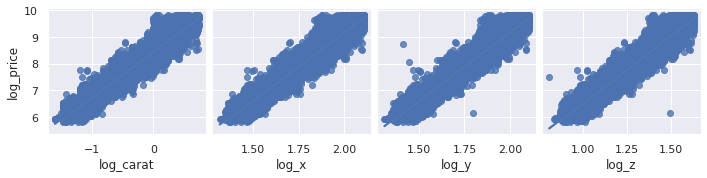

In [58]:
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.pairplot(data = diamond, y_vars = 'log_price', x_vars = ['log_carat', 'log_x', 'log_y', 'log_z'], kind = 'reg')

In [59]:
X2 = diamond[['log_carat', 'log_x', 'log_y', 'log_z']]
y2 = diamond[['log_price']]

In [60]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 2811)

In [61]:
model2 = LinearRegression()

In [62]:
model2.fit(X2_train, y2_train)

LinearRegression()

In [63]:
model2.score(X2_train, y2_train)

0.937217802716894

In [64]:
model2.score(X2_test, y2_test)

0.9356474252667943

In [65]:
percentage_model2_train = (model2.score(X2_train, y2_train) * 100).round(2)
percentage_model2_test = (model2.score(X2_test, y2_test) * 100).round(2)

In [66]:
print('The accuracy of the linearized model in the training data was {}%.'.format(percentage_model2_train))
print('The accuracy of the linearized model in the testing data was {}%.'.format(percentage_model2_test))

The accuracy of the linearized model in the training data was 93.72%.
The accuracy of the linearized model in the testing data was 93.56%.


## Comparing the models

In [67]:
variation = (percentage_model2_test - percentage_test_LR_accuracy).round(2)

In [68]:
print('The accuracy of the model was increased by {}%.'.format(variation))

The accuracy of the model was increased by 7.0%.
